In [9]:
import lorm
import disc.energy_stippling_g24
import disc.energy_curveling_g24
import numpy as np
import matplotlib.pyplot as plt

In [63]:
M = 400
N = 2
#energy = disc.energy_stippling_g24.plan(M,N)
energy = disc.energy_curveling_g24.plan(M,N,alpha=.01,p=2)#,m=3,sigma=2)
s2 = lorm.manif.Sphere2()
points = lorm.manif.ManifoldPointArrayParameterized(s2)
points.coords = np.random.randn(2*M,3)
points_new = lorm.manif.ManifoldPointArrayParameterized(s2)
points_new.coords = points.coords.copy()

<IPython.core.display.Javascript object>


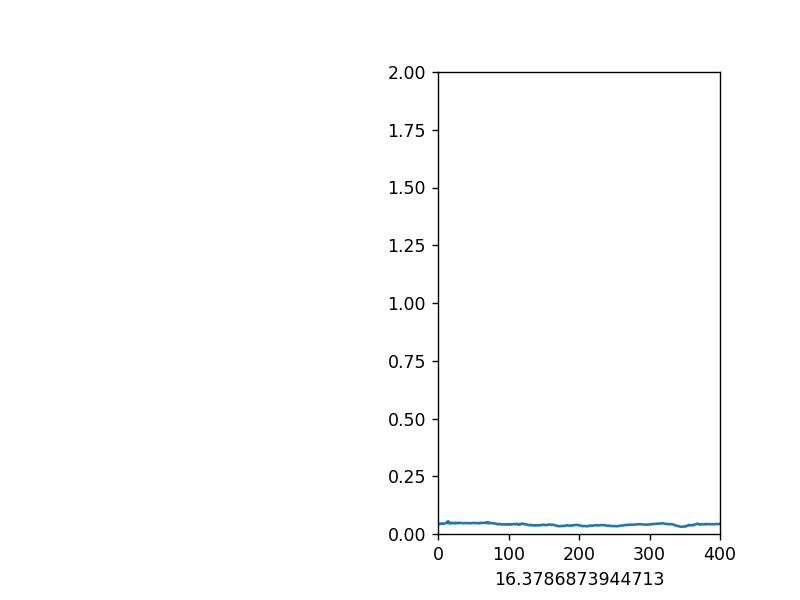

In [64]:
%matplotlib notebook
fig = plt.figure()

bx = fig.add_subplot(122)
bx.axis(np.array([0,M,0,2]))
bx.set_xlabel(np.sum(energy._eval_lengths(points.local_coords)))
distance = plt.Line2D(np.linspace(0,M,M),energy._eval_lengths(points.local_coords))
bx.add_line(distance)
def update_points(p):
    distance.set_ydata(energy._eval_lengths(p.local_coords))
    bx.set_xlabel(np.sum(energy._eval_lengths(p.local_coords)))
    fig.canvas.draw()
    return


In [75]:
method = lorm.optim.ConjugateGradientMethod(max_iter=30)
method.listener = update_points
energy._alpha = 1
energy._p = 5
points_new = method.run(energy,points_new)

Initial value: f[0] = 19.489782197229296
f[1] = 19.458306283518024
f[2] = 19.440647648784072
f[3] = 19.420330365561174
f[4] = 19.403429453621897
f[5] = 19.389343296608168
f[6] = 19.372620757967457
f[7] = 19.3558816535719
f[8] = 19.339611911226342
f[9] = 19.320614655338535
f[10] = 19.3014806955887
f[11] = 19.28183727385623
f[12] = 19.26077863381662
f[13] = 19.24039558464449
f[14] = 19.220776581486437
f[15] = 19.200758244124422
f[16] = 19.18191702379771
f[17] = 19.162895418389603
f[18] = 19.14197851121998
f[19] = 19.122720946781026
f[20] = 19.103341644843997
f[21] = 19.08488532752449
f[22] = 19.067305234109757
f[23] = 19.048793372115636
f[24] = 19.02908342711545
f[25] = 19.0090651953016
f[26] = 18.98784019398105
f[27] = 18.96516049837178
f[28] = 18.943640620599652
f[29] = 18.917522626609074
f[30] = 18.89103853099825
Reached maximal iterations!


In [76]:
np.savetxt('temp_g24.txt',points_new.coords)

In [738]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

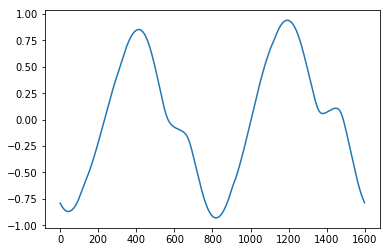

In [739]:
plt.plot(points_new.coords[:,2])

In [309]:
temp = np.array(points_new.coords)